In [21]:
import pandas as pd
import seaborn as sns
import numpy as np

## Test DataFrame

In [62]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 15, 13, 32, 24, 56, 25, 42, 13, 25, 1, 1, 1, 1, 2, 3, 4]
temp_df = pd.DataFrame({"test":a})
temp_df.head()

,test
0,1
1,2
2,3
3,4
4,5


In [25]:
# 왜도 양수 -> 오른쪽으로 긴꼬리 + 데이터가 왼쪽에 분포
temp_df.skew()

test    2.182136
dtype: float64

<AxesSubplot: xlabel='test', ylabel='Density'>

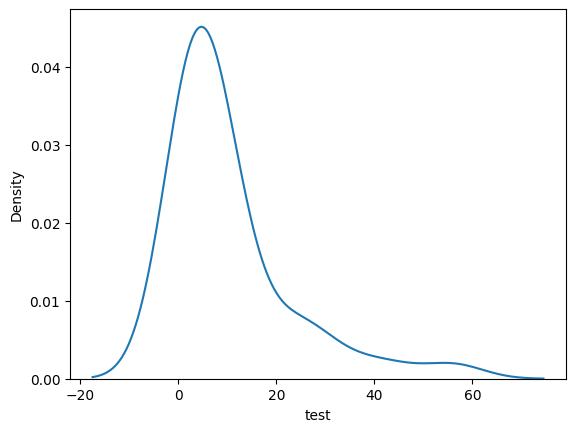

In [26]:
sns.kdeplot(data=temp_df, x="test")

In [120]:
from scipy.stats import skew, norm

# +=1 후 boxcox 변환
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax, boxcox

In [28]:
temp_df.values

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [11],
       [15],
       [13],
       [32],
       [24],
       [56],
       [25],
       [42],
       [13],
       [25],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 3],
       [ 4]])

In [29]:
np.squeeze(temp_df.values)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 11, 15, 13, 32, 24, 56, 25, 42, 13, 25,  1,  1,  1,  1,  2,  3,
        4])

In [42]:
# Returns
# boxcox : ndarray, Box-Cox power transformed array.
# maxlog : float, optional, If the lmbda parameter is None, the second returned argument is the lmbda that maximizes the log-likelihood function.
y, lambda_optimal = boxcox(np.squeeze(temp_df.values))
y, lambda_optimal

(array([0.        , 0.68283594, 1.07285971, 1.34545741, 1.55457164,
        1.72393505, 1.86608904, 1.98846285, 2.09581773, 0.        ,
        0.68283594, 1.07285971, 1.34545741, 1.55457164, 1.72393505,
        1.86608904, 1.98846285, 2.09581773, 2.27746376, 2.55512389,
        2.42747949, 3.21793124, 2.96883361, 3.69368031, 3.00436991,
        3.45055347, 2.42747949, 3.00436991, 0.        , 0.        ,
        0.        , 0.        , 0.68283594, 1.07285971, 1.34545741]),
 -0.043354029427530444)

In [44]:
y

array([0.        , 0.68283594, 1.07285971, 1.34545741, 1.55457164,
       1.72393505, 1.86608904, 1.98846285, 2.09581773, 0.        ,
       0.68283594, 1.07285971, 1.34545741, 1.55457164, 1.72393505,
       1.86608904, 1.98846285, 2.09581773, 2.27746376, 2.55512389,
       2.42747949, 3.21793124, 2.96883361, 3.69368031, 3.00436991,
       3.45055347, 2.42747949, 3.00436991, 0.        , 0.        ,
       0.        , 0.        , 0.68283594, 1.07285971, 1.34545741])

<AxesSubplot: ylabel='Density'>

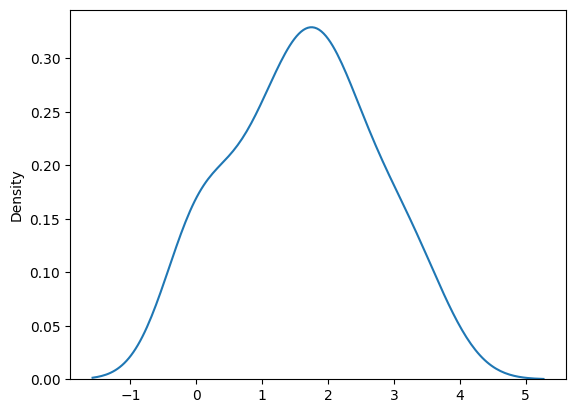

In [45]:
sns.kdeplot(y)

0    2.182136
dtype: float64


<AxesSubplot: ylabel='Density'>

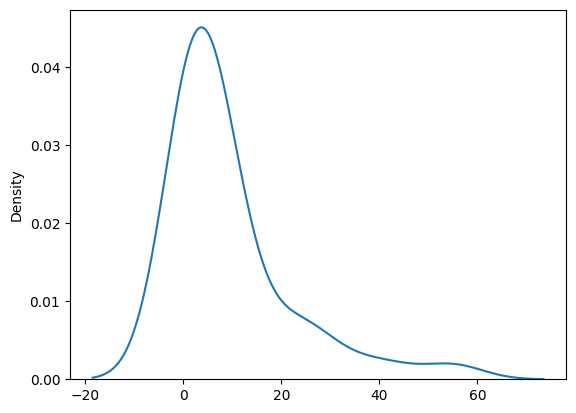

In [58]:
box = boxcox(np.squeeze(temp_df.values), lmbda=1)
print(pd.DataFrame(box).skew())
sns.kdeplot(box)

0    0.104564
dtype: float64


<AxesSubplot: ylabel='Density'>

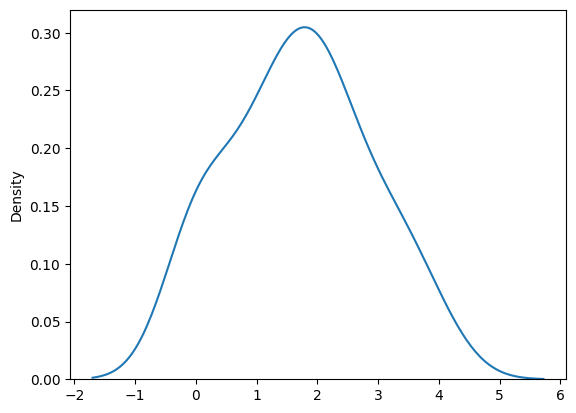

In [59]:
box = boxcox(np.squeeze(temp_df.values), lmbda=0)
print(pd.DataFrame(box).skew())
sns.kdeplot(box)

0   -1.300517
dtype: float64


<AxesSubplot: ylabel='Density'>

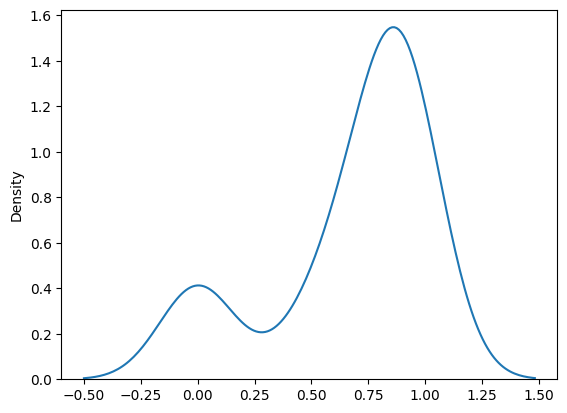

In [60]:
box = boxcox(np.squeeze(temp_df.values), lmbda=-1)
print(pd.DataFrame(box).skew())
sns.kdeplot(box)

0    3.657657
dtype: float64


<AxesSubplot: ylabel='Density'>

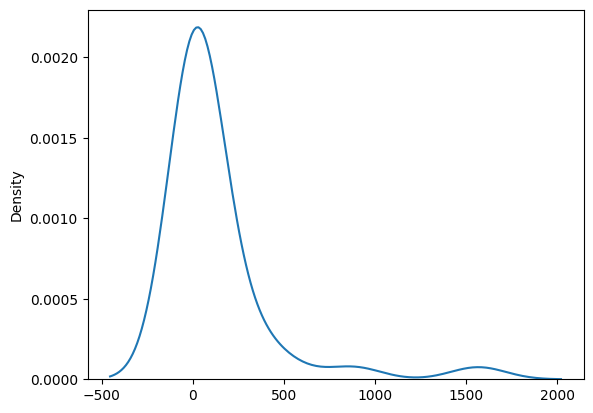

In [61]:
box = boxcox(np.squeeze(temp_df.values), lmbda=2)
print(pd.DataFrame(box).skew())
sns.kdeplot(box)

0    0.119766
dtype: float64


<AxesSubplot: ylabel='Density'>

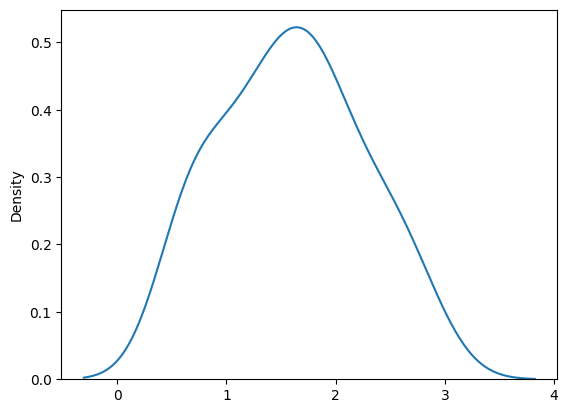

In [68]:
box1p = boxcox1p(np.squeeze(temp_df.values), boxcox_normmax(np.squeeze(temp_df.values) + 1))
print(pd.DataFrame(box1p).skew())
sns.kdeplot(box1p)

In [67]:
np.squeeze(temp_df.values) + 1

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 12, 16, 14, 33, 25, 57, 26, 43, 14, 26,  2,  2,  2,  2,  3,  4,
        5])

## 정규화 데이터

/var/folders/ql/gbsdt1191mbf_hk8mhnwwpd80000gn/T/ipykernel_74661/2835382406.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(setosa_sepal_length, rug=True)


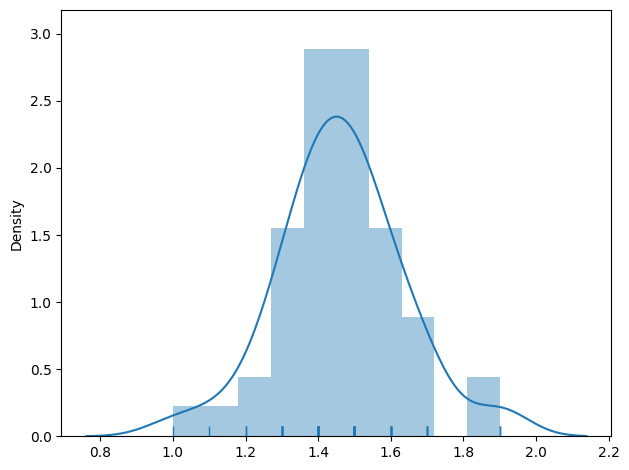

In [127]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

setosa_sepal_length = load_iris().data[:50, 2]
sns.distplot(setosa_sepal_length, rug=True)
plt.tight_layout()
plt.show()

0    0.106394
dtype: float64


<AxesSubplot: ylabel='Density'>

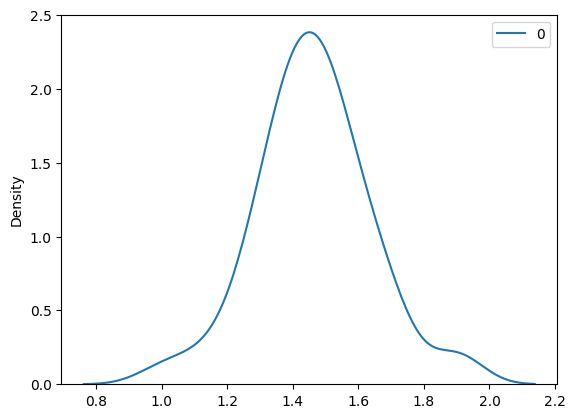

In [115]:
print(pd.DataFrame(setosa_sepal_length).skew())
sns.kdeplot(pd.DataFrame(setosa_sepal_length))

In [123]:
print("붓꽃 데이터")
setosa_sepal_length

붓꽃 데이터


array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [124]:
y, lambda_optimal = boxcox(setosa_sepal_length)
print("변환된 붓꽃 데이터")
print(y)
print()
print("적절한 lambda 값 :", lambda_optimal)

변환된 붓꽃 데이터
[0.38950492 0.38950492 0.29391034 0.48407806 0.38950492 0.67046178
 0.38950492 0.48407806 0.38950492 0.48407806 0.48407806 0.57770782
 0.38950492 0.09927605 0.19720323 0.48407806 0.29391034 0.38950492
 0.67046178 0.48407806 0.67046178 0.48407806 0.         0.67046178
 0.85357157 0.57770782 0.57770782 0.48407806 0.38950492 0.57770782
 0.57770782 0.48407806 0.48407806 0.38950492 0.48407806 0.19720323
 0.29391034 0.38950492 0.29391034 0.48407806 0.29391034 0.29391034
 0.29391034 0.57770782 0.85357157 0.38950492 0.57770782 0.38950492
 0.48407806 0.38950492]

적절한 lambda 값 : 0.8497405788538004


0    0.02869
dtype: float64


<AxesSubplot: ylabel='Density'>

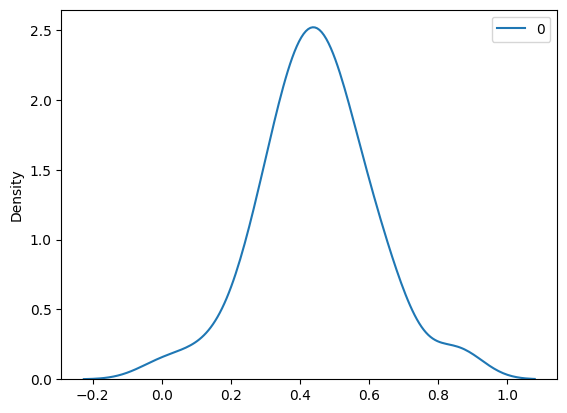

In [126]:
print(pd.DataFrame(y).skew())
sns.kdeplot(pd.DataFrame(y))

In [128]:
from scipy.special import boxcox

print("람다를 2로 지정하고 데이터 변환")
print(boxcox([1, 4, 10], 2))
print()
print("람다를 0으로 지정하고 데이터 변환 == log 변환")
print(boxcox([np.exp(1), np.exp(2), np.exp(3)], 0))
print()
print("지정하고 싶은 람다가 여러 개라면 리스트로 입력")
print(boxcox(4, [0, 1, 2]))

람다를 2로 지정하고 데이터 변환
[ 0.   7.5 49.5]

람다를 0으로 지정하고 데이터 변환 == log 변환
[1. 2. 3.]

지정하고 싶은 람다가 여러 개라면 리스트로 입력
[1.38629436 3.         7.5       ]
